# Iconic images for EAMENA Concepts

Associate one image to a EAMENA concept to illustrate this latter (ex: Threat type = Agricultural/Pastoral). Insert the concept UUID to the image's metadata (ex: 767e9467-3bc2-3f71-9427-0ace387bd843).

<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/concepts_images_threat_type_agricole.png" width = "500">

</center>

The objective is to link the concept image UUID to the RM (ex: node Threat type) and display these images in a `pyvis` interactive graph

## Libraries and paths

In [1]:
%cd /content/
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git

!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm
%cd /content/

!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
# %cd /content/eamena-functions/mds
# import mds
%cd /content/eamena-functions/
import mds
from mds import mds

# librairies
# for the images..
import os
import pandas as pd
!pip install exif
from exif import Image as exImg
from IPython.display import Image as IpImg
from IPython.display import Markdown, display, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive
# ..and for the graph
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from pyvis import network as net
import folium
import json
from google.colab import files

cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
# list
list_path = 'https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/list.tsv'

/content
Cloning into 'eamena-data'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 137 (delta 23), reused 128 (delta 16), pack-reused 0
Receiving objects: 100% (137/137), 3.56 MiB | 8.81 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Cloning into 'cultural-heritage'...
remote: Enumerating objects: 3270, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3270 (delta 0), reused 1 (delta 0), pack-reused 3260
Receiving objects: 100% (3270/3270), 34.23 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (2386/2386), done.
/content/cultural-heritage/graph-parser
/content
Cloning into 'eamena-functions'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 279 (delta 36), reused 53 (delta 21), pack-reused 210
Receiving objects

## Photographs listing

Photos of iconic cases of threats types (agricole, vandalsim, etc.)

In [2]:
df_list = pd.read_csv(list_path, sep='\t')
df_list['image_path'] = cases_img_path + df_list['image']
df_list

,label,image,uuid,uuid_parent,image_path
0,Threat type - Agricultural/Pastoral,threattype-agricole.jpg,767e9467-3bc2-3f71-9427-0ace387bd843,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
1,Threat type - Vandalism,threattype-vandalism-1.jpg,4e66f55d-0717-4d1f-89aa-949771ace643,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
2,Threat type - Looting and Illegal Activities,threattype-looting.jpg,66457bbc-965b-36aa-8fff-de0a28b68f33,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...
3,Threat type - Building and Development,threattype-urbanism.jpg,8e602902-3c8a-3430-a7df-fff6df57db8b,34cfea7b-c2c0-11ea-9026-02e7594ce0a0,https://raw.githubusercontent.com/eamena-proje...


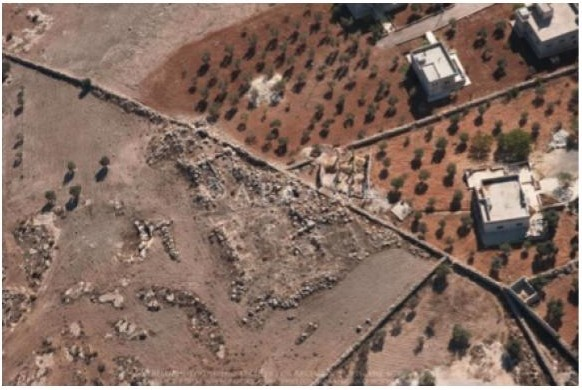

**https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/threattype-agricole.jpg**

In [3]:
cases_img_path = "https://raw.githubusercontent.com/eamena-project/eamena-data/main/reference-data/concepts/heritage_places/cases/img/" # cases_path + "img/"
img_path_1 = cases_img_path + "threattype-agricole.jpg"
display(IpImg(img_path_1))
display(Markdown(f"**{img_path_1}**"))

## Graph

In [4]:
my_rm = 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
gm.rm_selected_one(my_rm, gm.rm_list())
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')

/content/cultural-heritage/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory
EAMENA_Heritage%20Place.json has been loaded into the folder inputResourceModels/


In [5]:
rm_project= 'EAMENA'
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
# create the graph of images
G1 = gm.create_img_graph(G = G)
# merge with the RM graph
G_merged = nx.compose(G, G1)
hp_G = gm.plot_net_graph(G_merged, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)